<a href="https://colab.research.google.com/github/noushadkhan01/web-scraping/blob/master/delhi_election2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup

In [0]:
source = requests.get('http://results.eci.gov.in/DELHITRENDS2020/statewiseU051.htm')
source

<Response [200]>

In [0]:
source.content

b'<!DOCTYPE html>\r\n    <html><head>\r\n    <title>Election Commission of India</title>\r\n    <meta http-equiv=\'Content-Language\' content=\'en-us\'>\r\n    <meta http-equiv=\'Content-Type\' content=\'text/html; charset=UTF-8\'>\r\n    <meta http-equiv=\'X-UA-Compatible\' content=\'IE=7\'>\r\n    <meta http-equiv=\'Cache-Control\' content=\'no-cache, no-store, must-revalidate\'>\r\n    <meta http-equiv=\'Pragma\' content=\'no-cache\'>\r\n    <meta http-equiv=\'Expires\' content=\'0\'>\r\n    <meta http-equiv=\'refresh\' content=abc>\r\n     <style type=\'text/css\'>\r\n          body{\r\n        font-family: Verdana;Arial, Helvetica, sans-serif; font-size: 13px;\r\n        width: 1024px;\r\n        padding: 0px;\r\n        margin: 0 auto;\r\n        background:#105980;\r\n    }\r\n    .wrap-sec{\r\n        text-align:center;\r\n                width:1024px;\r\n    }\r\n    .tabc{\r\n        background-color: #fff;\r\n        width:1024px;\r\n    }\r\n    \r\n    .tabc h1{\r\n       

In [0]:
soup = BeautifulSoup(source.content, 'lxml')

In [0]:
soup

<!DOCTYPE html>
<html><head>
<title>Election Commission of India</title>
<meta content="en-us" http-equiv="Content-Language"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="abc" http-equiv="refresh"/>
<style type="text/css">
          body{
        font-family: Verdana;Arial, Helvetica, sans-serif; font-size: 13px;
        width: 1024px;
        padding: 0px;
        margin: 0 auto;
        background:#105980;
    }
    .wrap-sec{
        text-align:center;
                width:1024px;
    }
    .tabc{
        background-color: #fff;
        width:1024px;
    }
    
    .tabc h1{
         font-size: 26px;
         font-weight: bold;
    }
    .tabc h4{
        font-size: 16px;
        font-weight: bold;
        margin:0;
    }
   

**find table**

In [0]:
all_tables = soup.find_all('table')

In [0]:
len(all_tables)

50

In [0]:
all_tables

[<table class="tabc">
 <tbody>
 <tr><td> </td></tr>
 <tr><td>
 <a href="search.htm"><button class="refresh-rft" value="Refresh Page">Search</button></a>
 </td></tr>
 <tr>
 <td>
 </td>
 </tr>
 <tr>
 </tr><tr>
 <td colspan="100" style="text-align: center">
 <span class="btn-blank"></span>
 </td>
 </tr>
 <tr>
 <td style="font-size: 16px; font-weight: bold; text-align: center">
 <h3>GENERAL ELECTION TO VIDHAN SABHA TRENDS &amp; RESULT FEB-2020</h3>
 </td>
 </tr>
 <tr>
 <td align="center" style="font-weight: bolder;" valign="top" width="20%">
 <br/>
 <div style="font-size: 12px">
                                Click links below for
                             </div>
 <br/>
 <table border="0" cellpadding="0" cellspacing="0" class="ctl00_Menu1_2" id="ctl00_Menu1">
 <tbody><tr>
 <td id="ctl00_Menu1n0">
 <table border="0" cellpadding="0" cellspacing="0" class="ctl00_Menu1_4" width="100%">
 <tbody><tr>
 <td style="white-space: nowrap;">
 <a class="ctl00_Menu1_1 ctl00_Menu1_3" href="partywisere

In [0]:
table = all_tables[7]
table

<table width="100%">
<tbody>
<tr>
<td style="width: 100%">
<div id="divACList" style="border-bottom-style: none; border-right-style: none; border-top-style: none;
                                                        table-layout: auto; border-left-style: none">
<table border="1" style="margin: auto; width: 100%; font-family: Verdana; border: solid 1px black;font-weight:lighter"><tbody id="ElectionResult"><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="11"><b><h3>NCT OF Delhi <br/>Result Status</h3></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="8"><b><div id="divStatus" style="font-size: 10px"> Status Known For 70 out of 70 Constituencies</div></b></td><td align="center" colspan="3"><b><div style="font-size: 10px">Assembly Election Result 2015</div></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"> <th align="left">Constituency</th> <th>Const. No.</

In [0]:
table.find_all('th')

[<th align="left">Constituency</th>,
 <th>Const. No.</th>,
 <th align="left">Leading Candidate</th>,
 <th>Leading Party</th>,
 <th align="left">Trailing Candidate</th>,
 <th align="left">Trailing Party</th>,
 <th>Margin</th>,
 <th>Status</th>,
 <th>Winning Candidate</th>,
 <th>Winning Party</th>,
 <th>Margin</th>]

In [0]:
n_columns = len(table.find_all('th'))
n_columns

11

In [0]:
columns = []
for column in table.find_all('th'):
  columns.append(column.get_text())

In [0]:
columns

['Constituency',
 'Const. No.',
 'Leading Candidate',
 'Leading Party',
 'Trailing Candidate',
 'Trailing Party',
 'Margin',
 'Status',
 'Winning Candidate',
 'Winning Party',
 'Margin']

In [0]:
tr = table.find('tr')
tr

<tr>
<td style="width: 100%">
<div id="divACList" style="border-bottom-style: none; border-right-style: none; border-top-style: none;
                                                        table-layout: auto; border-left-style: none">
<table border="1" style="margin: auto; width: 100%; font-family: Verdana; border: solid 1px black;font-weight:lighter"><tbody id="ElectionResult"><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="11"><b><h3>NCT OF Delhi <br/>Result Status</h3></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="8"><b><div id="divStatus" style="font-size: 10px"> Status Known For 70 out of 70 Constituencies</div></b></td><td align="center" colspan="3"><b><div style="font-size: 10px">Assembly Election Result 2015</div></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"> <th align="left">Constituency</th> <th>Const. No.</th><th align="left">Leading C

##remove class **tooltip**

In [0]:
for div in tr.find_all('div', class_ = 'tooltip'):
  div.decompose()

In [0]:
for span in tr.find_all('span', class_ = 'tooltip-icon'):
  span.decompose()

In [0]:
tr

<tr>
<td style="width: 100%">
<div id="divACList" style="border-bottom-style: none; border-right-style: none; border-top-style: none;
                                                        table-layout: auto; border-left-style: none">
<table border="1" style="margin: auto; width: 100%; font-family: Verdana; border: solid 1px black;font-weight:lighter"><tbody id="ElectionResult"><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="11"><b><h3>NCT OF Delhi <br/>Result Status</h3></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="8"><b><div id="divStatus" style="font-size: 10px"> Status Known For 70 out of 70 Constituencies</div></b></td><td align="center" colspan="3"><b><div style="font-size: 10px">Assembly Election Result 2015</div></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"> <th align="left">Constituency</th> <th>Const. No.</th><th align="left">Leading C

In [0]:
td = tr.find('td')
td

<td style="width: 100%">
<div id="divACList" style="border-bottom-style: none; border-right-style: none; border-top-style: none;
                                                        table-layout: auto; border-left-style: none">
<table border="1" style="margin: auto; width: 100%; font-family: Verdana; border: solid 1px black;font-weight:lighter"><tbody id="ElectionResult"><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="11"><b><h3>NCT OF Delhi <br/>Result Status</h3></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="8"><b><div id="divStatus" style="font-size: 10px"> Status Known For 70 out of 70 Constituencies</div></b></td><td align="center" colspan="3"><b><div style="font-size: 10px">Assembly Election Result 2015</div></b></td></tr><tr style="height: 20px; background-color: #FFC0CD; color:Black;"> <th align="left">Constituency</th> <th>Const. No.</th><th align="left">Leading Candid

In [0]:
n = 1
for i in td.find_all('tr'):
  print(f'{n} :------- {i} \n\n\n')
  n += 1

1 :------- <tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="11"><b><h3>NCT OF Delhi <br/>Result Status</h3></b></td></tr> 



2 :------- <tr style="height: 20px; background-color: #FFC0CD; color:Black;"><td align="center" colspan="8"><b><div id="divStatus" style="font-size: 10px"> Status Known For 70 out of 70 Constituencies</div></b></td><td align="center" colspan="3"><b><div style="font-size: 10px">Assembly Election Result 2015</div></b></td></tr> 



3 :------- <tr style="height: 20px; background-color: #FFC0CD; color:Black;"> <th align="left">Constituency</th> <th>Const. No.</th><th align="left">Leading Candidate</th><th>Leading Party</th><th align="left">Trailing Candidate</th><th align="left">Trailing Party</th><th>Margin</th><th>Status</th><th>Winning Candidate</th><th>Winning Party</th><th>Margin</th></tr> 



4 :------- <tr>
<td align="center" colspan="11"> <a href="#">&lt;&lt; Previous</a>   <a href="statewiseU051.htm">1</a>  <a hr

**^As we can se up 4 tr rows are useless for our table so we will remove them**

In [0]:
full_tr = td.find_all('tr')[4:]
full_tr[:3]

[<tr style="font-size:12px;"><td align="left">ADARSH NAGAR</td><td align="center">4</td><td align="left">PAWAN SHARMA</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">RAJ KUMAR BHATIA</td><td align="left"><table><tbody><tr><td>Bharatiya Janata Party</td>
 <td style="vertical-align:top">
 </td></tr></tbody></table></td>
 <td align="right">1589</td><td align="center">Result Declared</td><td align="center" style="background-color: lightgray;">PAWAN KUMAR SHARMA</td><td align="center" style="background-color: lightgray;">Aam Aadmi Party</td><td align="center" style="background-color: lightgray;">20741</td></tr>,
 <tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr>,
 <tr><td>Bharatiya Janata Party</td>
 <td style="vertical-align:top">
 </td></tr>]

##remove extra **tr** which are useless for our table

In [0]:
for n, i in enumerate(full_tr):
  print(f'{n} :--- {i} \n\n\n')
  if n == 4:
    break

0 :--- <tr style="font-size:12px;"><td align="left">ADARSH NAGAR</td><td align="center">4</td><td align="left">PAWAN SHARMA</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">RAJ KUMAR BHATIA</td><td align="left"><table><tbody><tr><td>Bharatiya Janata Party</td>
<td style="vertical-align:top">
</td></tr></tbody></table></td>
<td align="right">1589</td><td align="center">Result Declared</td><td align="center" style="background-color: lightgray;">PAWAN KUMAR SHARMA</td><td align="center" style="background-color: lightgray;">Aam Aadmi Party</td><td align="center" style="background-color: lightgray;">20741</td></tr> 



1 :--- <tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr> 



2 :--- <tr><td>Bharatiya Janata Party</td>
<td style="vertical-align:top">
</td></tr> 



3 :--- <tr style="font-size:12px;"><td align="left">AMBEDKAR NAGAR(SC)</td><td align="center">48</td><td align="le

In [0]:
final_tr = []
n = 0
for i in full_tr:
  try:
    final_tr.append(full_tr[n])
    n += 3
  except:
    break

In [0]:
final_tr[:4]

[<tr style="font-size:12px;"><td align="left">ADARSH NAGAR</td><td align="center">4</td><td align="left">PAWAN SHARMA</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">RAJ KUMAR BHATIA</td><td align="left"><table><tbody><tr><td>Bharatiya Janata Party</td>
 <td style="vertical-align:top">
 </td></tr></tbody></table></td>
 <td align="right">1589</td><td align="center">Result Declared</td><td align="center" style="background-color: lightgray;">PAWAN KUMAR SHARMA</td><td align="center" style="background-color: lightgray;">Aam Aadmi Party</td><td align="center" style="background-color: lightgray;">20741</td></tr>,
 <tr style="font-size:12px;"><td align="left">AMBEDKAR NAGAR(SC)</td><td align="center">48</td><td align="left">AJAY DUTT</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">KHUSHIRAM CHUNAR</td><td al

In [0]:
final_tr[-2:]

[<tr style="font-size:12px;"><td align="left">BURARI</td><td align="center">2</td><td align="left">SANJEEV JHA</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">SHAILENDRA KUMAR</td><td align="left"><table><tbody><tr><td>Janata Dal (United)</td>
 <td style="vertical-align:top">
 </td></tr></tbody></table></td>
 <td align="right">88158</td><td align="center">Result Declared</td><td align="center" style="background-color: lightgray;">SANJEEV JHA</td><td align="center" style="background-color: lightgray;">Aam Aadmi Party</td><td align="center" style="background-color: lightgray;">67950</td></tr>,
 <tr style="font-size:12px;"><td align="left">CHANDNI CHOWK</td><td align="center">20</td><td align="left">PARLAD SINGH SAWHNEY</td><td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td><td align="left">SUMAN KUMAR GUPTA</td><td align="left

In [0]:
for i in final_tr:
  print(i.find_all('td'), '\n\n\n')

[<td align="left">ADARSH NAGAR</td>, <td align="center">4</td>, <td align="left">PAWAN SHARMA</td>, <td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td style="vertical-align:top"></td></tr></tbody></table></td>, <td>Aam Aadmi Party</td>, <td style="vertical-align:top"></td>, <td align="left">RAJ KUMAR BHATIA</td>, <td align="left"><table><tbody><tr><td>Bharatiya Janata Party</td>
<td style="vertical-align:top">
</td></tr></tbody></table></td>, <td>Bharatiya Janata Party</td>, <td style="vertical-align:top">
</td>, <td align="right">1589</td>, <td align="center">Result Declared</td>, <td align="center" style="background-color: lightgray;">PAWAN KUMAR SHARMA</td>, <td align="center" style="background-color: lightgray;">Aam Aadmi Party</td>, <td align="center" style="background-color: lightgray;">20741</td>] 



[<td align="left">AMBEDKAR NAGAR(SC)</td>, <td align="center">48</td>, <td align="left">AJAY DUTT</td>, <td align="left"><table><tbody><tr><td>Aam Aadmi Party</td><td s

In [0]:
table_data = []
for i in final_tr:
  th = []
  for j in i.find_all('td'):
    th.append(j.get_text())
    #print(j.get_text(), ',')
  table_data.append(th)
  #print('\n\n\n')
  #print(i.get_text())

In [0]:
len(table_data)

10

In [0]:
table_data[0]

['ADARSH NAGAR',
 '4',
 'PAWAN SHARMA',
 'Aam Aadmi Party',
 'Aam Aadmi Party',
 '',
 'RAJ KUMAR BHATIA',
 'Bharatiya Janata Party\n\n',
 'Bharatiya Janata Party',
 '\n',
 '1589',
 'Result Declared',
 'PAWAN KUMAR SHARMA',
 'Aam Aadmi Party',
 '20741']

In [0]:
for i in table_data:
  print(len(i), end = ',')

15,15,15,15,15,15,15,15,15,15,

###remove unneccessary data

In [0]:
' hello world\n\n'.strip('\n')

' hello world'

In [0]:
a = ['', '', 'a']

In [0]:
print(a)

['', '', 'a']


In [0]:
a = filter(lambda x : x != '', a)
list(a)

['a']

In [0]:
 final_table = []
for i in table_data:
  th = []
  for j in i:
    j.strip()
    #remove \n from string
    j = j.strip('\n')
    th.append(j)
  th = list(filter(lambda x: x != '', th))
  print(th)
  final_table.append(th)
  

['ADARSH NAGAR', '4', 'PAWAN SHARMA', 'Aam Aadmi Party', 'Aam Aadmi Party', 'RAJ KUMAR BHATIA', 'Bharatiya Janata Party', 'Bharatiya Janata Party', '1589', 'Result Declared', 'PAWAN KUMAR SHARMA', 'Aam Aadmi Party', '20741']
['AMBEDKAR NAGAR(SC)', '48', 'AJAY DUTT', 'Aam Aadmi Party', 'Aam Aadmi Party', 'KHUSHIRAM CHUNAR', 'Bharatiya Janata Party', 'Bharatiya Janata Party', '28327', 'Result Declared', 'AJAY DUTT', 'Aam Aadmi Party', '42460']
['BABARPUR', '67', 'GOPAL RAI', 'Aam Aadmi Party', 'Aam Aadmi Party', 'NARESH GAUR', 'Bharatiya Janata Party', 'Bharatiya Janata Party', '33062', 'Result Declared', 'GOPAL RAI', 'Aam Aadmi Party', '35271']
['BADARPUR', '53', 'RAMVIR SINGH BIDHURI', 'Bharatiya Janata Party', 'Bharatiya Janata Party', 'RAM SINGH NETAJI', 'Aam Aadmi Party', 'Aam Aadmi Party', '3719', 'Result Declared', 'NARAYAN DUTT SHARMA', 'Aam Aadmi Party', '47583']
['BADLI', '5', 'AJESH YADAV', 'Aam Aadmi Party', 'Aam Aadmi Party', 'VIJAY KUMAR BHAGAT', 'Bharatiya Janata Party', '

In [0]:
for i in final_table:
  print(len(i), end = ',')

13,13,13,13,13,13,13,13,13,13,

###remove extra party name

In [0]:
f_table = []
for i in final_table:
  th = []
  for n, j in enumerate(i):
    if i[n] == i[n-1]:
      continue
    else:
      th.append(j)
  f_table.append(th)

In [0]:
for i in f_table:
  print(len(i), end = ',')

11,11,11,11,11,11,11,11,11,11,

In [0]:
f_table

[['ADARSH NAGAR',
  '4',
  'PAWAN SHARMA',
  'Aam Aadmi Party',
  'RAJ KUMAR BHATIA',
  'Bharatiya Janata Party',
  '1589',
  'Result Declared',
  'PAWAN KUMAR SHARMA',
  'Aam Aadmi Party',
  '20741'],
 ['AMBEDKAR NAGAR(SC)',
  '48',
  'AJAY DUTT',
  'Aam Aadmi Party',
  'KHUSHIRAM CHUNAR',
  'Bharatiya Janata Party',
  '28327',
  'Result Declared',
  'AJAY DUTT',
  'Aam Aadmi Party',
  '42460'],
 ['BABARPUR',
  '67',
  'GOPAL RAI',
  'Aam Aadmi Party',
  'NARESH GAUR',
  'Bharatiya Janata Party',
  '33062',
  'Result Declared',
  'GOPAL RAI',
  'Aam Aadmi Party',
  '35271'],
 ['BADARPUR',
  '53',
  'RAMVIR SINGH BIDHURI',
  'Bharatiya Janata Party',
  'RAM SINGH NETAJI',
  'Aam Aadmi Party',
  '3719',
  'Result Declared',
  'NARAYAN DUTT SHARMA',
  'Aam Aadmi Party',
  '47583'],
 ['BADLI',
  '5',
  'AJESH YADAV',
  'Aam Aadmi Party',
  'VIJAY KUMAR BHAGAT',
  'Bharatiya Janata Party',
  '29123',
  'Result Declared',
  'AJESH YADAV',
  'Aam Aadmi Party',
  '35376'],
 ['BALLIMARAN',
  '

#Automate that process for all 7 pages

In [0]:
import pandas as pd

In [0]:
import requests
from bs4 import BeautifulSoup

In [0]:
urls = ['http://results.eci.gov.in/DELHITRENDS2020/statewiseU051.htm']
n = 2
while n <= 7:
  urls.append('http://results.eci.gov.in/DELHITRENDS2020/statewiseU05' + str(n) + '.htm')
  n += 1

In [0]:
urls

['http://results.eci.gov.in/DELHITRENDS2020/statewiseU051.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU052.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU053.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU054.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU055.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU056.htm',
 'http://results.eci.gov.in/DELHITRENDS2020/statewiseU057.htm']

In [0]:
import sys

In [0]:
dfs = []
for url_no, url in enumerate(urls):
  source = requests.get(url)
  soup = BeautifulSoup(source.content, 'lxml')
  print(f'{url_no + 1} soup done')
  #find all tables
  all_tables = soup.find_all('table')
  #select table which have useful data
  table = all_tables[7]
  #find header of the table
  table.find_all('th')
  n_columns = len(table.find_all('th'))
  columns = []
  for column in table.find_all('th'):
    columns.append(column.get_text())
  #find table rows
  tr = table.find('tr')
  ##remove class **tooltip**
  for div in tr.find_all('div', class_ = 'tooltip'):
    div.decompose()
  for span in tr.find_all('span', class_ = 'tooltip-icon'):
    span.decompose()

  #find td in tr
  td = tr.find('td')
  #**^As we can se up 4 tr rows are useless for our table so we will remove them**
  full_tr = td.find_all('tr')[4:]
  #remove extra **tr** which are useless for our table
  print(f'{url_no + 1} final tr done')
  final_tr = []
  n = 0
  for i in full_tr:
    try:
      final_tr.append(full_tr[n])
      n += 3
    except:
      break

  #get the text of the table
  table_data = []
  for i in final_tr:
    th = []
    for j in i.find_all('td'):
      th.append(j.get_text())
    table_data.append(th)


  ###remove unneccessary data

  final_table = []
  for i in table_data:
    th = []
    for j in i:
      j.strip()
      #remove \n from string
      j = j.strip('\n')
      th.append(j)
    th = list(filter(lambda x: x != '', th))
    final_table.append(th)

  f_table = []
  for i in final_table:
    th = []
    for n, j in enumerate(i):
      if i[n] == i[n-1]:
        continue
      else:
        th.append(j)
    f_table.append(th)
  df = pd.DataFrame(data = f_table, columns = columns)
  dfs.append(df)
  print(url_no + 1, 'done', '\n\n')

1 soup done
1 final tr done
1 done 


2 soup done
2 final tr done
2 done 


3 soup done
3 final tr done
3 done 


4 soup done
4 final tr done
4 done 


5 soup done
5 final tr done
5 done 


6 soup done
6 final tr done
6 done 


7 soup done
7 final tr done
7 done 




In [0]:
columns

['Constituency',
 'Const. No.',
 'Leading Candidate',
 'Leading Party',
 'Trailing Candidate',
 'Trailing Party',
 'Margin',
 'Status',
 'Winning Candidate',
 'Winning Party',
 'Margin']

In [0]:
len(dfs)

7

In [0]:
dfs[:3]

[         Constituency Const. No.  ...    Winning Party Margin
 0        ADARSH NAGAR          4  ...  Aam Aadmi Party  20741
 1  AMBEDKAR NAGAR(SC)         48  ...  Aam Aadmi Party  42460
 2            BABARPUR         67  ...  Aam Aadmi Party  35271
 3            BADARPUR         53  ...  Aam Aadmi Party  47583
 4               BADLI          5  ...  Aam Aadmi Party  35376
 5          BALLIMARAN         22  ...  Aam Aadmi Party  33877
 6          BAWANA(SC)          7  ...  Aam Aadmi Party  50557
 7            BIJWASAN         36  ...  Aam Aadmi Party  19536
 8              BURARI          2  ...  Aam Aadmi Party  67950
 9       CHANDNI CHOWK         20  ...  Aam Aadmi Party  18287
 
 [10 rows x 11 columns],
       Constituency Const. No.  ...    Winning Party Margin
 0       CHHATARPUR         46  ...  Aam Aadmi Party  22240
 1      DELHI CANTT         38  ...  Aam Aadmi Party  11198
 2        DEOLI(SC)         47  ...  Aam Aadmi Party  63937
 3           DWARKA         33  ...  Aam

In [0]:
data = pd.DataFrame(columns = columns)
for i in dfs:
  data = pd.concat([data, i], axis = 0)


In [0]:
data.shape

(70, 11)

In [0]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,Winning Candidate,Winning Party,Margin
0,ADARSH NAGAR,4,PAWAN SHARMA,Aam Aadmi Party,RAJ KUMAR BHATIA,Bharatiya Janata Party,1589,Result Declared,PAWAN KUMAR SHARMA,Aam Aadmi Party,20741
1,AMBEDKAR NAGAR(SC),48,AJAY DUTT,Aam Aadmi Party,KHUSHIRAM CHUNAR,Bharatiya Janata Party,28327,Result Declared,AJAY DUTT,Aam Aadmi Party,42460
2,BABARPUR,67,GOPAL RAI,Aam Aadmi Party,NARESH GAUR,Bharatiya Janata Party,33062,Result Declared,GOPAL RAI,Aam Aadmi Party,35271
3,BADARPUR,53,RAMVIR SINGH BIDHURI,Bharatiya Janata Party,RAM SINGH NETAJI,Aam Aadmi Party,3719,Result Declared,NARAYAN DUTT SHARMA,Aam Aadmi Party,47583
4,BADLI,5,AJESH YADAV,Aam Aadmi Party,VIJAY KUMAR BHAGAT,Bharatiya Janata Party,29123,Result Declared,AJESH YADAV,Aam Aadmi Party,35376


In [0]:
data.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,Winning Candidate,Winning Party,Margin
5,TUGHLAKABAD,52,SAHIRAM,Aam Aadmi Party,VIKRAM BIDHURI,Bharatiya Janata Party,13758,Result Declared,SAHI RAM,Aam Aadmi Party,33701
6,UTTAM NAGAR,32,NARESH BALYAN,Aam Aadmi Party,KRISHAN GAHLOT,Bharatiya Janata Party,19759,Result Declared,NARESH BALYAN,Aam Aadmi Party,30419
7,VIKASPURI,31,MAHINDER YADAV,Aam Aadmi Party,SANJAY SINGH,Bharatiya Janata Party,42058,Result Declared,MAHINDER YADAV,Aam Aadmi Party,77665
8,VISHWAS NAGAR,59,OM PRAKASH SHARMA,Bharatiya Janata Party,DEEPAK SINGLA,Aam Aadmi Party,16457,Result Declared,OM PRAKASH SHARMA,Bharatiya Janata Party,10158
9,WAZIRPUR,17,RAJESH GUPTA,Aam Aadmi Party,DR. MAHENDER NAGPAL,Bharatiya Janata Party,11690,Result Declared,RAJESH GUPTA,Aam Aadmi Party,22044


In [0]:
data.shape

(70, 11)

In [0]:
columns = ['Constituency', 'Const. No.', 'Winning Candidate', 'Winning Party', '2nd Candidate', '2nd Party','Margin', 'Status',
           'Past Winning Candidate', 'Past Winning Party', 'Past Margin']

In [0]:
data.columns = columns

In [0]:
data.head(2)

,Constituency,Const. No.,Winning Candidate,Winning Party,2nd Candidate,2nd Party,Margin,Status,Past Winning Candidate,Past Winning Party,Past Margin
0,ADARSH NAGAR,4,PAWAN SHARMA,Aam Aadmi Party,RAJ KUMAR BHATIA,Bharatiya Janata Party,1589,Result Declared,PAWAN KUMAR SHARMA,Aam Aadmi Party,20741
1,AMBEDKAR NAGAR(SC),48,AJAY DUTT,Aam Aadmi Party,KHUSHIRAM CHUNAR,Bharatiya Janata Party,28327,Result Declared,AJAY DUTT,Aam Aadmi Party,42460


In [0]:
import seaborn as sns

In [0]:
data.to_csv('delhi_election.csv', index = False)

In [0]:
from google.colab import files
files.download('delhi_election.csv')

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [0]:
data['Margin'] = data.Margin.apply(lambda x: int(x))

In [43]:
data.Margin.values[0]

1589

In [0]:
data['Past Margin'] = data['Past Margin'].apply(lambda x: int(x))

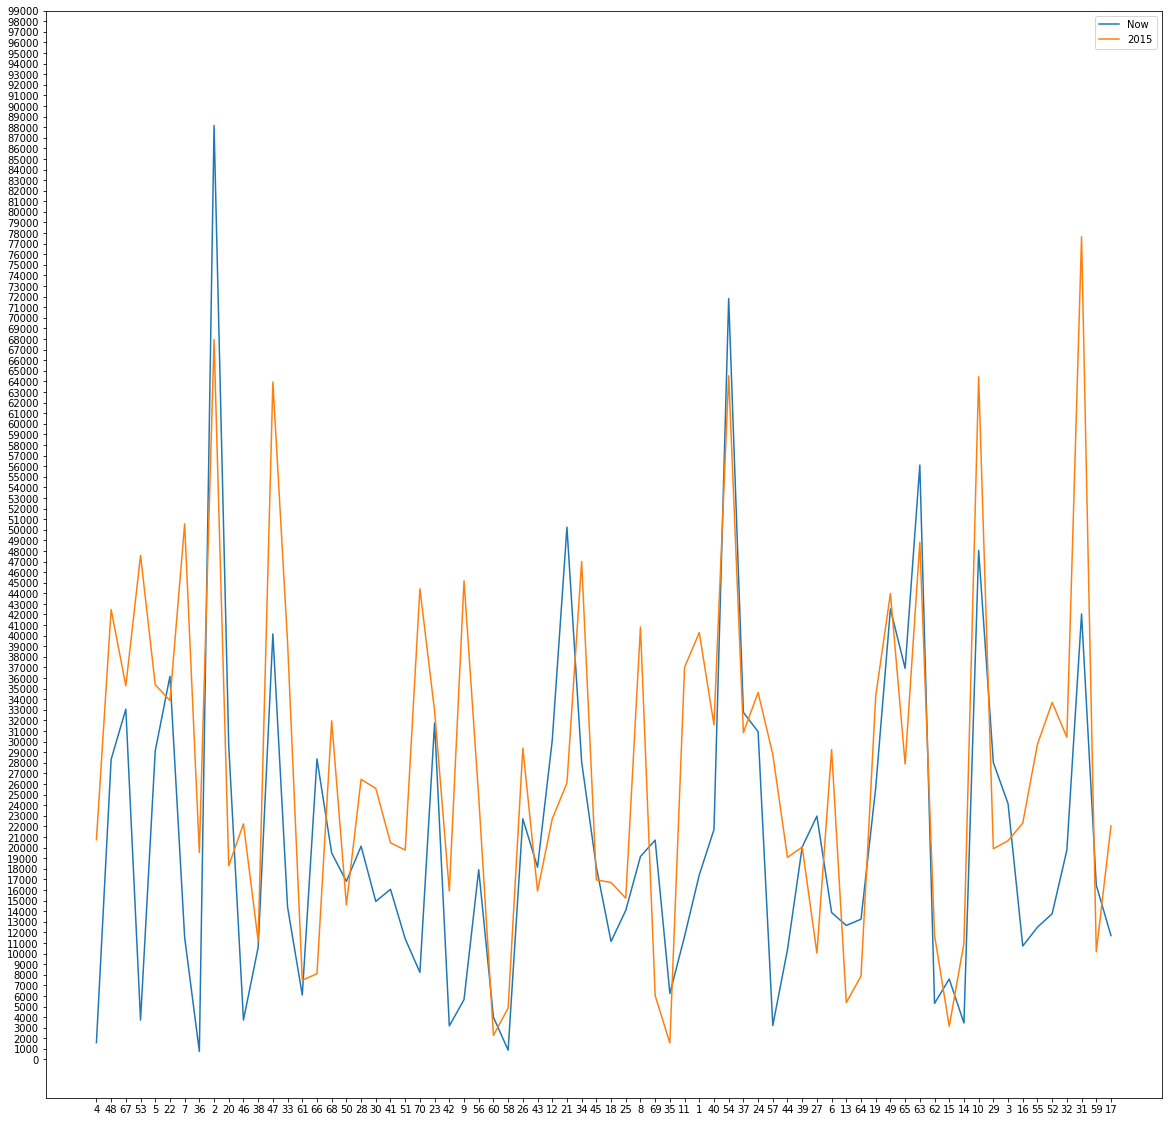

In [50]:
plt.figure(figsize = (20, 20))
plt.plot(data['Const. No.'], data.Margin, label = 'Now')
plt.plot(data['Const. No.'], data['Past Margin'], label = '2015')
plt.yticks(range(0, 100000, 1000))
plt.legend()

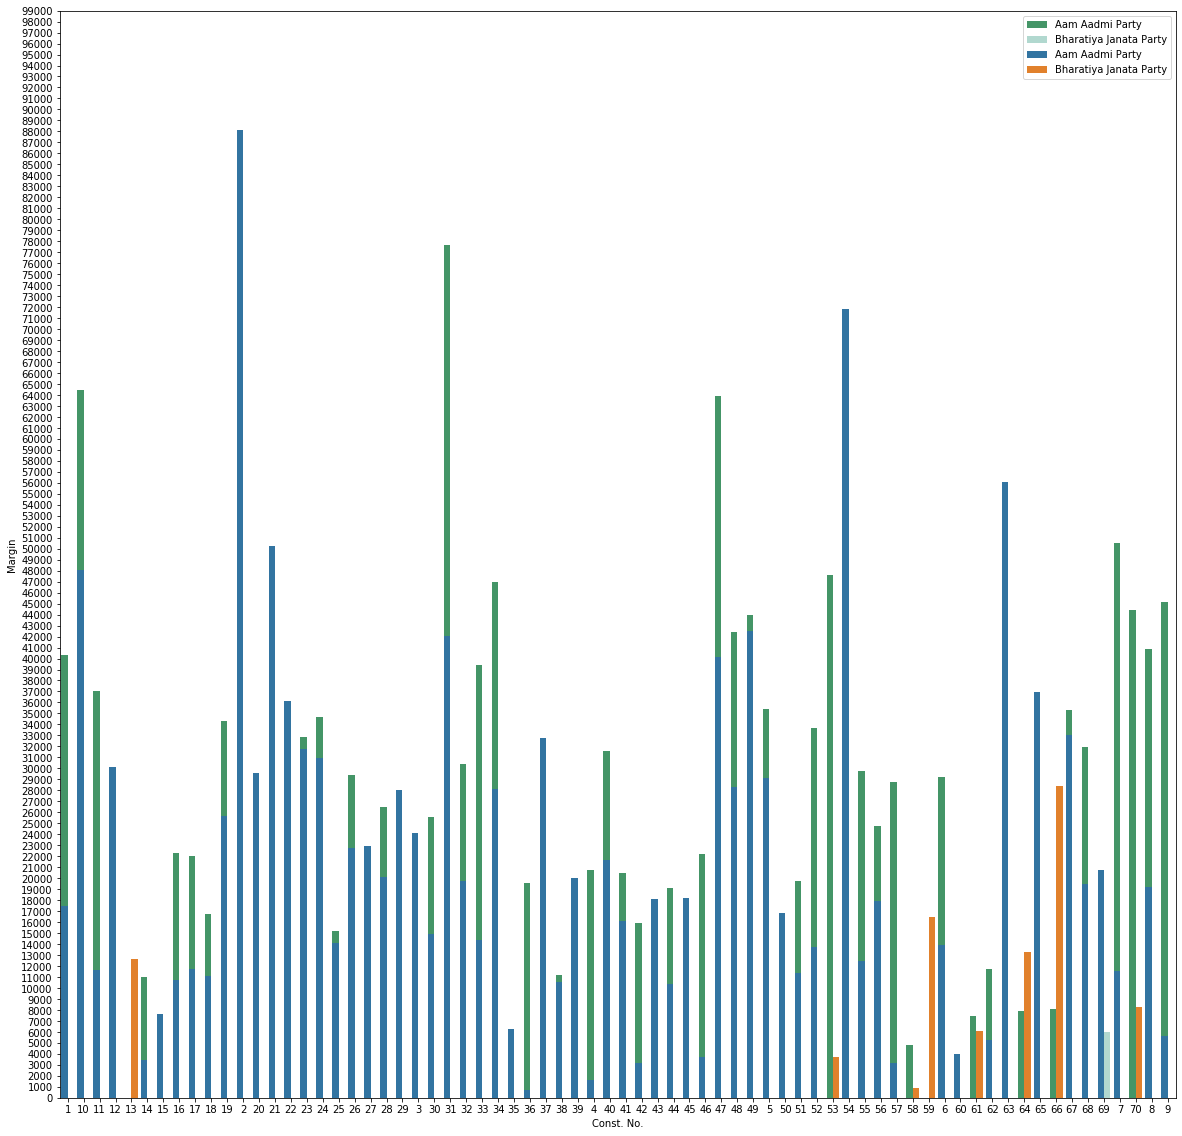

In [78]:
plt.figure(figsize = (20, 20))
sns.barplot(x = 'Const. No.', y = 'Past Margin', data = data, hue = 'Past Winning Party', palette = 'BuGn_r' )
sns.barplot(x = 'Const. No.', y = 'Margin', data = data, hue = 'Winning Party')
plt.yticks(range(0, 100000, 1000))
plt.legend()
plt.show()

In [59]:
data[data.Margin < 1000][['Winning Party', 'Margin']]

,Winning Party,Margin
7,Aam Aadmi Party,753
8,Bharatiya Janata Party,880


In [60]:
data[data.Margin < 5000][['Winning Party', 'Margin']]


,Winning Party,Margin
0,Aam Aadmi Party,1589
3,Bharatiya Janata Party,3719
7,Aam Aadmi Party,753
0,Aam Aadmi Party,3720
4,Aam Aadmi Party,3165
7,Aam Aadmi Party,3995
8,Bharatiya Janata Party,880
6,Aam Aadmi Party,3207
9,Aam Aadmi Party,3440


In [61]:
bjp_now = data[data['Winning Party'] == 'Bharatiya Janata Party'].Constituency.values
bjp_now

array(['BADARPUR', 'GANDHI NAGAR', 'GHONDA', 'KARAWAL NAGAR',
       'LAXMI NAGAR', 'ROHINI', 'ROHTAS NAGAR', 'VISHWAS NAGAR'],
      dtype=object)

In [65]:
bjp_2015 = data[data['Past Winning Party'] == 'Bharatiya Janata Party'].Constituency.values
bjp_2015

array(['MUSTAFABAD', 'ROHINI', 'VISHWAS NAGAR'], dtype=object)

In [67]:
set(bjp_now) - set(bjp_2015)

{'BADARPUR',
 'GANDHI NAGAR',
 'GHONDA',
 'KARAWAL NAGAR',
 'LAXMI NAGAR',
 'ROHTAS NAGAR'}

In [0]:
data.Margin